In [1]:
#préparation : import des données, analyse, resetting, imputing and scaling et modélisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('Exam_Score_Prediction.csv')

In [3]:
df.head(5)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


In [4]:
df['age'].isna().sum()

0

In [5]:
df.shape

(20000, 13)

In [6]:
df['age'].max()

24

In [9]:
df.groupby('age')['age'].count()

age
17    2514
18    2542
19    2528
20    2488
21    2555
22    2497
23    2433
24    2443
Name: age, dtype: int64

In [9]:
print(2500*8)

20000


array([[<Axes: title={'center': 'student_id'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'study_hours'}>,
        <Axes: title={'center': 'class_attendance'}>],
       [<Axes: title={'center': 'sleep_hours'}>,
        <Axes: title={'center': 'exam_score'}>]], dtype=object)

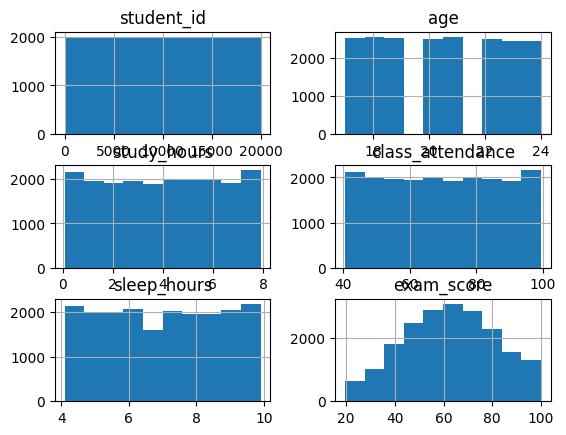

In [10]:
df.hist() #vizualise distribution

In [11]:
df['age'].describe()

count    20000.000000
mean        20.473300
std          2.284458
min         17.000000
25%         18.000000
50%         20.000000
75%         22.000000
max         24.000000
Name: age, dtype: float64

In [12]:
#some checking
df.columns

Index(['student_id', 'age', 'gender', 'course', 'study_hours',
       'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality',
       'study_method', 'facility_rating', 'exam_difficulty', 'exam_score'],
      dtype='object')

In [13]:
df['student_id'].nunique()

20000

In [14]:
#no duplicates

In [15]:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


<Axes: xlabel='exam_score', ylabel='study_hours'>

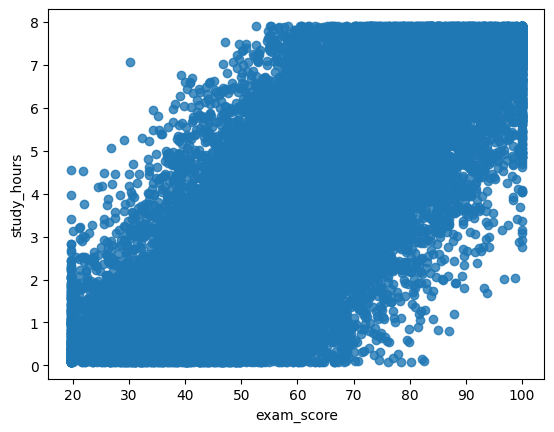

In [16]:
sns.regplot(data=df, x='exam_score', y='study_hours', color=None) #there is a correlation

In [17]:
#definition des steps : créer un pipeline, pour créer le pipeline importer les dépendencies pipeline, mais aussi columntransformer
# utiliser les transformers d'homogénéisation


In [18]:
from sklearn.model_selection import train_test_split


In [10]:
#preprocess data

cat_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=True, handle_unknown='ignore'))
     ])

In [11]:
num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('encoder', StandardScaler())
     ])

In [12]:
preprocess=ColumnTransformer([
    ('num', num_pipeline, df.select_dtypes(exclude='object').columns),
    ('cat', cat_pipeline, df.select_dtypes(include='object').columns)
]) #columns are transformed

In [13]:
preprocess.fit(df)
preprocess.get_feature_names_out()

array(['num__student_id', 'num__age', 'num__study_hours',
       'num__class_attendance', 'num__sleep_hours', 'num__exam_score',
       'cat__gender_female', 'cat__gender_male', 'cat__gender_other',
       'cat__course_b.com', 'cat__course_b.sc', 'cat__course_b.tech',
       'cat__course_ba', 'cat__course_bba', 'cat__course_bca',
       'cat__course_diploma', 'cat__internet_access_no',
       'cat__internet_access_yes', 'cat__sleep_quality_average',
       'cat__sleep_quality_good', 'cat__sleep_quality_poor',
       'cat__study_method_coaching', 'cat__study_method_group study',
       'cat__study_method_mixed', 'cat__study_method_online videos',
       'cat__study_method_self-study', 'cat__facility_rating_high',
       'cat__facility_rating_low', 'cat__facility_rating_medium',
       'cat__exam_difficulty_easy', 'cat__exam_difficulty_hard',
       'cat__exam_difficulty_moderate'], dtype=object)

In [14]:
# create a split
X=df.drop(columns=['exam_score'])
y=df['exam_score']

# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
x_train.fit_transform()
x_test.transform()

AttributeError: 'DataFrame' object has no attribute 'fit_transform'

In [ ]:
x_train_df = pd.DataFrame(x_train, columns=X)
corr = x_train_df.corr()

In [ ]:
sns.heatmap(corr, linewidths=0.05, linecolor='red', cbar=True, annot=True, fmt='. 2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()